# "2019 November One Day Holding Long Short Portfolio BackTest"
> "2019 November Portfolio"
- toc: false
- branch: master
- badges: false
- comments: true
- categories: [long, short, longshort]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

In [1]:
#hide_input
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import gc
import glob
import matplotlib.pyplot as plt

In [2]:
#hide_input
df_testp=pd.read_csv('D:\\Downloads\\20194dayreturnpred2019train60K.csv')

In [3]:
#hide
df_testp=df_testp.loc[df_testp.Date>=20191101].loc[df_testp.Date<20191201].sort_values(by='Date',ascending=True).copy()

**Long-Short Portfolio**

In [4]:
#hide
df_agg=df_testp[['Date','labelr1']].groupby(['Date']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [5]:
#hide_input
df_agg

,Date,labelr1,cumreturn1
0,20191105,-34.545455,1.000000
1,20191106,0.214362,0.654545
2,20191108,1.357966,0.655949
3,20191112,24.604935,0.664856
4,20191113,23.914052,0.828444
5,20191114,9.611436,1.026558
6,20191115,-11.623377,1.125225
7,20191118,-0.106684,0.994436
8,20191119,-3.085927,0.993375
9,20191120,-24.030112,0.962720


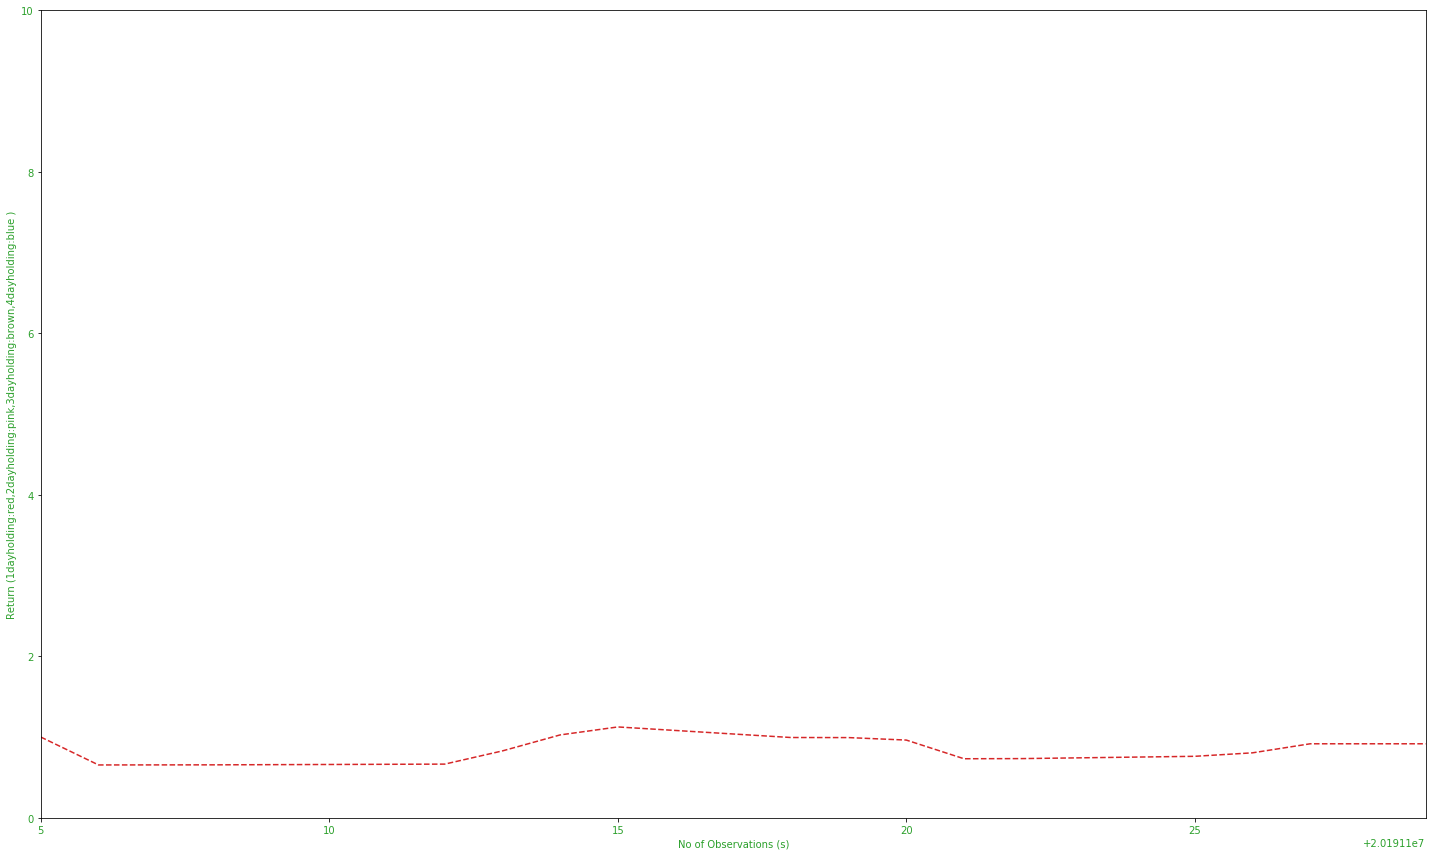

In [6]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()

**Long portfolio**

In [7]:
#hide
df_agg=df_testp[['Date','pred','labelr1']].loc[df_testp.pred==1.0].groupby(['Date','pred']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [8]:
#hide_input
df_agg

,Date,pred,labelr1,cumreturn1
0,20191105,1.0,-34.545455,1.000000
1,20191106,1.0,0.214362,0.654545
2,20191108,1.0,1.357966,0.655949
3,20191112,1.0,24.604935,0.664856
4,20191113,1.0,23.914052,0.828444
5,20191114,1.0,9.611436,1.026558
6,20191115,1.0,-11.623377,1.125225
7,20191118,1.0,-0.106684,0.994436
8,20191119,1.0,-3.085927,0.993375
9,20191120,1.0,-24.030112,0.962720


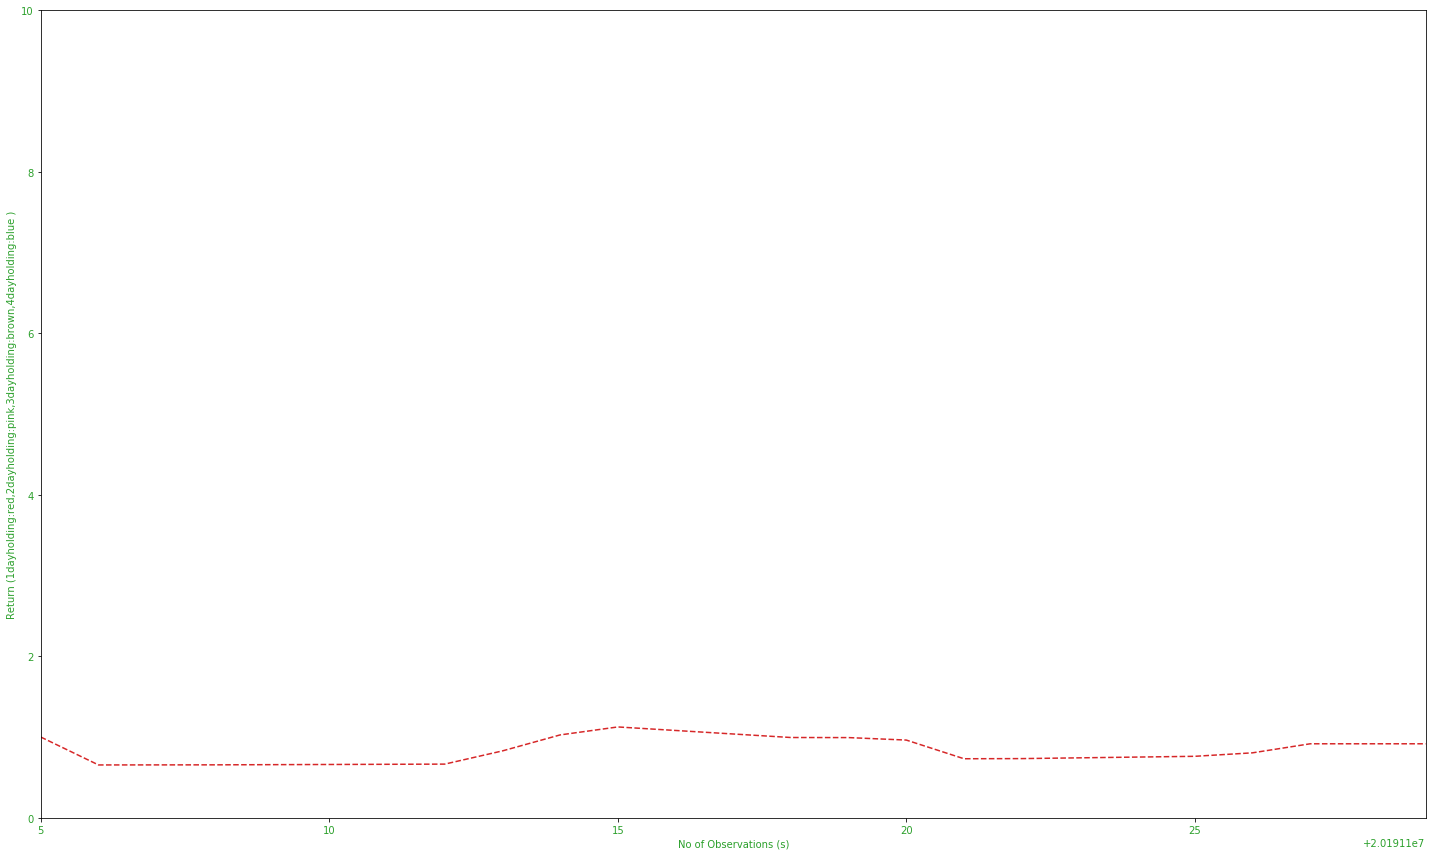

In [9]:
#hide_input
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()

**Short Portfolio**

In [10]:
#hide
df_agg=df_testp[['Date','pred','labelr1']].loc[df_testp.pred==-1.0].groupby(['Date','pred']).sum().reset_index();
df_agg['cumreturn1']=0.0
for l in range(len(df_agg)):
    df_agg['cumreturn1'][l]=np.prod((1+(df_agg['labelr1']/100))[:l])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
#hide_input
df_agg

,Date,pred,labelr1,cumreturn1
0,20191121,-1.0,0.0,1.0
1,20191127,-1.0,0.0,1.0


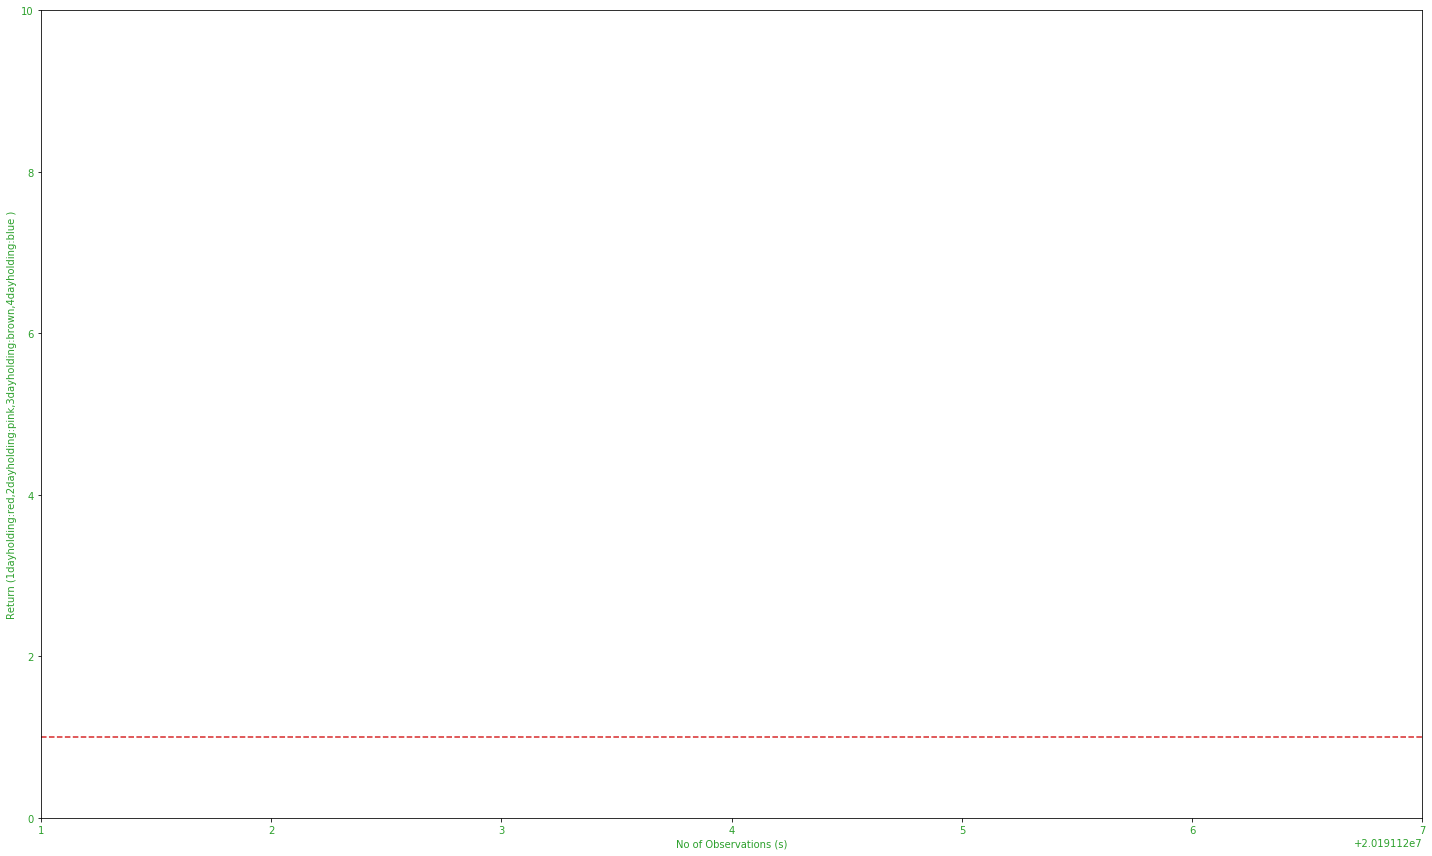

In [12]:
#hide
fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('No of Observations (s)',color='tab:green')
a1.set_ylabel('Return (1dayholding:red,2dayholding:pink,3dayholding:brown,4dayholding:blue )', color='tab:green')
a1.plot(df_agg['Date'], df_agg['cumreturn1'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor='tab:green')
a1.tick_params(axis='x', labelcolor='tab:green')

a,b = 0,10
a1.set_ylim(a,b)


x,y =df_agg['Date'].min(),df_agg['Date'].max()
a1.set_xlim(x,y)



fig.tight_layout()